In [1]:
#Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a reference the CSV file desired
csv_path_1 = "accidents-final.csv"
csv_path_2 = "accidents-2015.csv"

# Read the CSV into a Pandas DataFrame
accidents_df = pd.read_csv(csv_path_1)
accident_2015 = pd.read_csv(csv_path_2)

In [3]:
accidents_df.head()

,Unnamed: 0,STATE,ST_CASE,VE_FORMS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,...,LGT_COND,WEATHER1,WEATHER2,WEATHER,CF1,CF2,CF3,FATALS,DRUNK_DR,state_county_city
0,0,Alabama,10001,1,73,Hoover,1,1,2016,6,...,Daylight,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,1,1,Alabama_73_1716
1,1,Alabama,10002,1,73,Hoover,10,1,2016,1,...,Dark - Lighted,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,1,1,Alabama_73_1716
2,2,Alabama,10003,1,73,Jefferson,1,1,2016,6,...,Dark - Lighted,Cloudy,No Additional Atmospheric Conditions,Cloudy,None,None,None,1,0,Alabama_73_0
3,3,Alabama,10004,1,73,Jefferson,17,1,2016,1,...,Dark - Lighted,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,1,1,Alabama_73_0
4,4,Alabama,10005,1,73,Vestavia Hills,26,1,2016,3,...,Dark - Lighted,Rain,No Additional Atmospheric Conditions,Rain,None,None,None,1,0,Alabama_73_3125


In [4]:
accident_2015.head()


,Unnamed: 0,ST_CASE,HARM_EV_2015
0,0,10001,Embankment
1,1,10002,Ditch
2,2,10003,Tree (Standing Only)
3,3,10004,Mail Box
4,4,10005,Motor Vehicle In-Transport


In [5]:
# calculate total # of accidents 
total_accidents_2016 = accidents_df['ST_CASE'].count()
total_accidents_2015 = accident_2015['ST_CASE'].count()

# get the top 8 accident types
accidents_common = pd.DataFrame(accidents_df['HARM_EV'].value_counts().head(8)).reset_index()
accidents_common_2015 = pd.DataFrame(accident_2015['HARM_EV_2015'].value_counts().head(8)).reset_index()
accidents_common = accidents_common.merge(accidents_common_2015)
accidents_common = accidents_common.rename(columns={'index': 'Crash Type', 'HARM_EV' : '# of Accidents 2016', 'HARM_EV_2015' : '# of Accidents 2015'})
# displaying only top 5 and Pedalcyclist
accidents_most_common= accidents_common.loc[[0,1,2,3,4,7]]
# calculate the % for each
accidents_most_common['% Accidents 2016'] = ((accidents_most_common['# of Accidents 2016']/total_accidents_2016)*100).round(2)
accidents_most_common['% Accidents 2015'] = ((accidents_most_common['# of Accidents 2015']/total_accidents_2015)*100).round(2)
accidents_most_common


,Crash Type,# of Accidents 2016,# of Accidents 2015,% Accidents 2016,% Accidents 2015
0,Motor Vehicle In-Transport,13097,12367,38.03,38.01
1,Pedestrian,5548,5092,16.11,15.65
2,Rollover/Overturn,3067,2833,8.91,8.71
3,Tree (Standing Only),2538,2315,7.37,7.11
4,Curb,1077,1117,3.13,3.43
7,Pedalcyclist,822,814,2.39,2.50


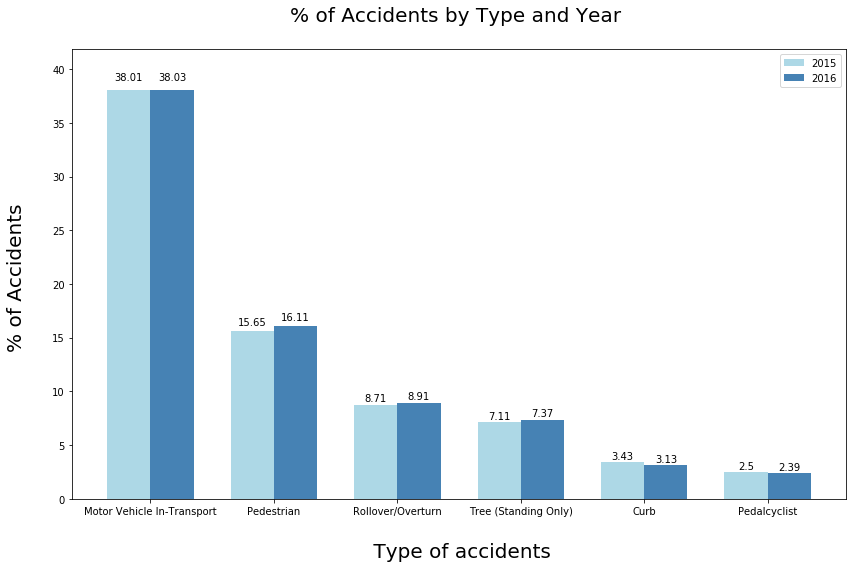

In [6]:
# create a plot
#  set x labels and y values
x_labels = accidents_most_common['Crash Type']
y_vals_2016 = accidents_most_common['% Accidents 2016']
y_vals_2015 = accidents_most_common['% Accidents 2015']

x_vals = np.arange(len(x_labels))  # the x locations for the groups
width = 0.35      # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects_2015 = ax.bar(x_vals, y_vals_2015, width, color='lightblue')
rects_2016 = ax.bar(x_vals+width, y_vals_2016, width, color='steelblue')


# add some text for labels, title and axes ticks
ax.set_xlabel('\n Type of accidents', fontsize=20)
ax.set_ylabel('% of Accidents \n', fontsize=20)
ax.set_title('% of Accidents by Type and Year \n', fontsize=20)
ax.set_xticks(x_vals + width / 2)
ax.set_xticklabels(x_labels)
ax.set_ylim(0, 1.1*(max(y_vals_2016)))

# set legend labels
ax.legend((rects_2015[0], rects_2016[0]), ('2015', '2016'))

#Attach a text label above each bar displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%s' % str(height), ha='center', va='bottom')

autolabel(rects_2016)
autolabel(rects_2015)
plt.tight_layout()
plt.savefig("%_of_accidents_by_Type_and_Year")
plt.show()

In [7]:
csv_path_per1 = "FARS2016NationalCSV/person.csv"
persons_2016 = pd.read_csv(csv_path_per1)
csv_path_per2 = "FARS2016NationalCSV/Inj_Sev.csv"
inj_sev = pd.read_csv(csv_path_per2)
persons_2016['INJ_SEV'] = persons_2016['INJ_SEV'].map(inj_sev.set_index('Code')['Attribute'])
csv_path_per3 = "FARS2016NationalCSV/personType.csv"
personType = pd.read_csv(csv_path_per3)
persons_2016['PER_TYP'] = persons_2016['PER_TYP'].map(personType.set_index('Code')['Attribute'])

persons_2016 = persons_2016.drop(persons_2016.columns[[2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46, 47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67]], axis=1)
persons_2016.head()

,STATE,ST_CASE,VEH_NO,PER_NO,AGE,SEX,PER_TYP,INJ_SEV
0,1,10001,1,1,37,2,Driver of a Motor Vehicle In-Transport,Fatal Injury
1,1,10002,1,1,24,1,Driver of a Motor Vehicle In-Transport,Suspected Serious Injury
2,1,10002,1,2,22,1,Passenger of a Motor Vehicle In-Transport,Fatal Injury
3,1,10003,1,1,22,1,Driver of a Motor Vehicle In-Transport,Fatal Injury
4,1,10003,2,1,50,1,Occupant of a Motor Vehicle Not In-Transport,No Apparent Injury


In [8]:
persons_2016['INJ_SEV'].value_counts()

Fatal Injury                 37461
No Apparent Injury           20753
Suspected Minor Injury        9749
Suspected Serious Injury      8530
Possible Injury               7355
Unknown/Not Reported          1394
Injured, Severity Unknown      251
Died Prior to Crash              3
Name: INJ_SEV, dtype: int64

In [9]:
# Establish the bins 
age_bins = [0, 9.90, 19.90, 29.90, 39.90, 49.90, 59.90, 69.90, 999]
group_names = ["Below 10", "10 - 19", "20 - 29", "30 - 39", "40 - 49", "50 -59", "60 - 69", "70 and Above"]

# Categorize the existing players using the age bins
persons_2016["Age Ranges"] = pd.cut(persons_2016["AGE"], age_bins, labels=group_names)

# Calculate the Numbers by Age Group
age_demographics_totals = persons_2016["Age Ranges"].value_counts()
age_demographics_totals

20 - 29         19031
30 - 39         13111
50 -59          11325
40 - 49         10939
10 - 19          9613
70 and Above     9269
60 - 69          8063
Below 10         3785
Name: Age Ranges, dtype: int64

In [10]:
# # get the records where the severity of injury is of type 4
# inj_sev_4 = persons_2016.loc[persons_2016['INJ_SEV'] == "Fatal Injury"]
# # Get counts by age group
# inj_sev_4_count = inj_sev_4.groupby(["Age Ranges"]).count()['INJ_SEV']
# inj_sev_4_count

In [11]:
persons_2016.head()

,STATE,ST_CASE,VEH_NO,PER_NO,AGE,SEX,PER_TYP,INJ_SEV,Age Ranges
0,1,10001,1,1,37,2,Driver of a Motor Vehicle In-Transport,Fatal Injury,30 - 39
1,1,10002,1,1,24,1,Driver of a Motor Vehicle In-Transport,Suspected Serious Injury,20 - 29
2,1,10002,1,2,22,1,Passenger of a Motor Vehicle In-Transport,Fatal Injury,20 - 29
3,1,10003,1,1,22,1,Driver of a Motor Vehicle In-Transport,Fatal Injury,20 - 29
4,1,10003,2,1,50,1,Occupant of a Motor Vehicle Not In-Transport,No Apparent Injury,50 -59


In [12]:
merged_df = pd.merge(accidents_df[['ST_CASE','HARM_EV']], persons_2016, on='ST_CASE', how='outer')
merged_df.head()


,ST_CASE,HARM_EV,STATE,VEH_NO,PER_NO,AGE,SEX,PER_TYP,INJ_SEV,Age Ranges
0,10001,Tree (Standing Only),1,1,1,37,2,Driver of a Motor Vehicle In-Transport,Fatal Injury,30 - 39
1,10002,Rollover/Overturn,1,1,1,24,1,Driver of a Motor Vehicle In-Transport,Suspected Serious Injury,20 - 29
2,10002,Rollover/Overturn,1,1,2,22,1,Passenger of a Motor Vehicle In-Transport,Fatal Injury,20 - 29
3,10003,Parked Motor Vehicle,1,1,1,22,1,Driver of a Motor Vehicle In-Transport,Fatal Injury,20 - 29
4,10003,Parked Motor Vehicle,1,2,1,50,1,Occupant of a Motor Vehicle Not In-Transport,No Apparent Injury,50 -59


In [13]:
inj_sev_4 = merged_df.loc[merged_df['INJ_SEV'] == "Fatal Injury"]
inj_sev_4.head()

,ST_CASE,HARM_EV,STATE,VEH_NO,PER_NO,AGE,SEX,PER_TYP,INJ_SEV,Age Ranges
0,10001,Tree (Standing Only),1,1,1,37,2,Driver of a Motor Vehicle In-Transport,Fatal Injury,30 - 39
2,10002,Rollover/Overturn,1,1,2,22,1,Passenger of a Motor Vehicle In-Transport,Fatal Injury,20 - 29
3,10003,Parked Motor Vehicle,1,1,1,22,1,Driver of a Motor Vehicle In-Transport,Fatal Injury,20 - 29
5,10004,Concrete Traffic Barrier,1,1,1,36,1,Driver of a Motor Vehicle In-Transport,Fatal Injury,30 - 39
6,10005,Tree (Standing Only),1,1,1,59,1,Driver of a Motor Vehicle In-Transport,Fatal Injury,50 -59


In [14]:
num_persons_crash_type = pd.DataFrame(merged_df.groupby(['HARM_EV'])['ST_CASE']\
                                                         .count() \
                                                         .reset_index(name='count') \
                                                         .sort_values(['count'], ascending=False) \
                                                         .head(6))
num_persons_crash_type.rename(columns={'count': '# Persons'}, inplace=True)
num_persons_crash_type

,HARM_EV,# Persons
25,Motor Vehicle In-Transport,44189
37,Pedestrian,13774
40,Rollover/Overturn,5894
46,Tree (Standing Only),3850
36,Pedalcyclist,1949
9,Curb,1741


In [15]:
num_persons_crash_type_fatal =pd.DataFrame(inj_sev_4.groupby(['HARM_EV'])['ST_CASE']\
                                             .count() \
                                             .reset_index(name='count') \
                                             .sort_values(['count'], ascending=False) \
                                             .head(8))
num_persons_crash_type_fatal.rename(columns={'count': '# Fatalities'}, inplace=True)   
num_persons_crash_type_fatal

,HARM_EV,# Fatalities
25,Motor Vehicle In-Transport,14996
37,Pedestrian,5617
40,Rollover/Overturn,3276
46,Tree (Standing Only),2732
9,Curb,1153
11,Embankment,1017
10,Ditch,1004
36,Pedalcyclist,832


In [16]:
accidents_most_common = accidents_most_common.merge(num_persons_crash_type, left_on='Crash Type', right_on='HARM_EV')
accidents_most_common.drop(['HARM_EV'], axis=1, inplace=True)
accidents_most_common

,Crash Type,# of Accidents 2016,# of Accidents 2015,% Accidents 2016,% Accidents 2015,# Persons
0,Motor Vehicle In-Transport,13097,12367,38.03,38.01,44189
1,Pedestrian,5548,5092,16.11,15.65,13774
2,Rollover/Overturn,3067,2833,8.91,8.71,5894
3,Tree (Standing Only),2538,2315,7.37,7.11,3850
4,Curb,1077,1117,3.13,3.43,1741
5,Pedalcyclist,822,814,2.39,2.50,1949


In [17]:
accidents_most_common = accidents_most_common.merge(num_persons_crash_type_fatal, left_on='Crash Type', right_on='HARM_EV')
accidents_most_common.drop(['HARM_EV'], axis=1, inplace=True)
accidents_most_common

,Crash Type,# of Accidents 2016,# of Accidents 2015,% Accidents 2016,% Accidents 2015,# Persons,# Fatalities
0,Motor Vehicle In-Transport,13097,12367,38.03,38.01,44189,14996
1,Pedestrian,5548,5092,16.11,15.65,13774,5617
2,Rollover/Overturn,3067,2833,8.91,8.71,5894,3276
3,Tree (Standing Only),2538,2315,7.37,7.11,3850,2732
4,Curb,1077,1117,3.13,3.43,1741,1153
5,Pedalcyclist,822,814,2.39,2.50,1949,832


In [18]:
inj_sev_4_women = merged_df.loc[(merged_df['INJ_SEV'] == "Fatal Injury") & (merged_df['SEX'] == 2) & (merged_df['PER_TYP'] == 'Driver of a Motor Vehicle In-Transport')]
inj_sev_4_women
num_women_crash_type_fatal =pd.DataFrame(inj_sev_4_women.groupby(['HARM_EV'])['ST_CASE']\
                                             .count() \
                                             .reset_index(name='count') \
                                             .sort_values(['count'], ascending=False) \
                                             .head(5))
num_women_crash_type_fatal.rename(columns={'count': '# Fatalities Women Drivers'}, inplace=True)   
num_women_crash_type_fatal

,HARM_EV,# Fatalities Women Drivers
24,Motor Vehicle In-Transport,2959
43,Tree (Standing Only),464
37,Rollover/Overturn,409
11,Embankment,206
10,Ditch,190


In [32]:
inj_sev_4_men = merged_df.loc[(merged_df['INJ_SEV'] == "Fatal Injury") & (merged_df['SEX'] == 1)\
                              & (merged_df['PER_TYP'] == 'Driver of a Motor Vehicle In-Transport')]

num_men_crash_type_fatal =pd.DataFrame(inj_sev_4_men.groupby(['HARM_EV'])['ST_CASE']\
                                             .count() \
                                             .reset_index(name='# Fatalities Men Drivers') \
                                             .sort_values(['# Fatalities Men Drivers'], ascending=False) \
                                             .head(5))
num_men_crash_type_fatal

,HARM_EV,# Fatalities Men Drivers
24,Motor Vehicle In-Transport,8389
38,Rollover/Overturn,2082
44,Tree (Standing Only),1726
9,Curb,768
10,Ditch,616


In [20]:
inj_sev_4_others = merged_df.loc[(merged_df['INJ_SEV'] == "Fatal Injury") & ((merged_df['SEX'] == 8) | (merged_df['SEX'] == 9)) & (merged_df['PER_TYP'] == 'Driver of a Motor Vehicle In-Transport')]
inj_sev_4_others
num_others_crash_type_fatal =pd.DataFrame(inj_sev_4_others.groupby(['HARM_EV'])['ST_CASE']\
                                             .count() \
                                             .reset_index(name='count') \
                                             .sort_values(['count'], ascending=False) \
                                             .head(8))
num_others_crash_type_fatal.rename(columns={'count': '# Fatalities Others Drivers'}, inplace=True)   
num_others_crash_type_fatal

,HARM_EV,# Fatalities Others Drivers
4,Motor Vehicle In-Transport,3
0,Curb,2
1,Ditch,2
5,Rollover/Overturn,2
2,Fence,1
3,Guardrail Face,1
6,Tree (Standing Only),1
7,Unknown,1


In [21]:
merged_men_women_fatalities = pd.merge(num_men_crash_type_fatal, num_women_crash_type_fatal, how='outer')
merged_men_women_fatalities

,HARM_EV,# Fatalities Men Drivers,# Fatalities Women Drivers
0,Motor Vehicle In-Transport,8389.0,2959.0
1,Rollover/Overturn,2082.0,409.0
2,Tree (Standing Only),1726.0,464.0
3,Curb,768.0,NaN
4,Ditch,616.0,190.0
5,Embankment,NaN,206.0


In [22]:
inj_sev_4_count_age = pd.DataFrame(inj_sev_4.groupby(["Age Ranges"])['ST_CASE']\
                                   .count()\
                                   .reset_index(name='Count of Fatalaties') \
                                   .sort_values(['Count of Fatalaties'], ascending=False) \
                                    )

inj_sev_4_count_age

,Age Ranges,Count of Fatalaties
2,20 - 29,8168
3,30 - 39,5667
5,50 -59,5628
7,70 and Above,4911
4,40 - 49,4883
6,60 - 69,4361
1,10 - 19,3070
0,Below 10,701


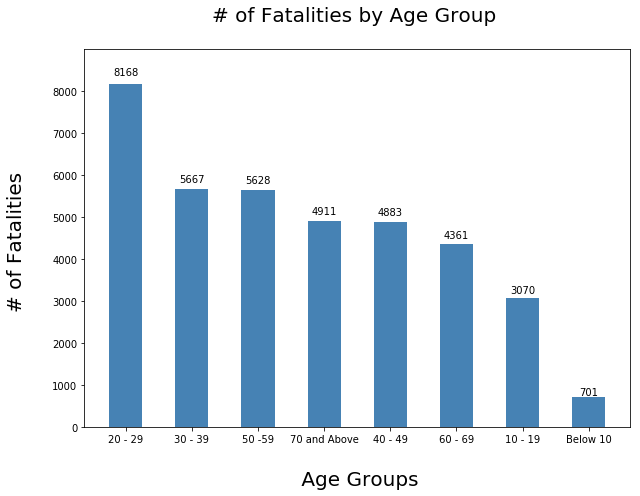

In [23]:
# create a plot
#  set x labels and y values
x_labels = inj_sev_4_count_age['Age Ranges']
y_vals = inj_sev_4_count_age['Count of Fatalaties']

x_vals = np.arange(len(x_labels))  # the x locations for the groups
width = 0.5      # the width of the bars
fig, ax = plt.subplots(figsize=(9, 7))
rects = ax.bar(x_vals, y_vals, width, color='steelblue')

# add some text for labels, title and axes ticks
ax.set_xlabel('\n Age Groups', fontsize=20)
ax.set_ylabel('# of Fatalities \n', fontsize=20)
ax.set_title('# of Fatalities by Age Group \n', fontsize=20)
ax.set_xticks(x_vals)
ax.set_xticklabels(x_labels)
ax.set_ylim(0, 1.1*(max(y_vals)))

#Attach a text label above each bar displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%s' % str(height), ha='center', va='bottom')

autolabel(rects)
plt.tight_layout()
plt.savefig("# Fatalaties by Age.png")
plt.show()

In [24]:
# import vehicle csv file
vehicle_df = pd.read_csv("FARS2016NationalCSV/vehicle.csv")

/Users/Puri/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (36,37,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
vehicle_df_2 = vehicle_df[['ST_CASE', 'VEH_NO', 'SPEEDREL']]
vehicle_df_2.head()
vehicle_df_2['ST_CASE'].count()

52231

In [26]:
vehicle_df_2['ST_CASE_VEH_NO'] = vehicle_df_2['ST_CASE'].astype(str) + vehicle_df_2['VEH_NO'].astype(str)
vehicle_df_2.head()

/Users/Puri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ST_CASE,VEH_NO,SPEEDREL,ST_CASE_VEH_NO
0,10001,1,0,100011
1,10002,1,9,100021
2,10003,1,0,100031
3,10004,1,0,100041
4,10005,1,4,100051


In [27]:
vehicle_df_2['ST_CASE_VEH_NO'].nunique()


52231

In [28]:
inj_sev_4.head()

,ST_CASE,HARM_EV,STATE,VEH_NO,PER_NO,AGE,SEX,PER_TYP,INJ_SEV,Age Ranges
0,10001,Tree (Standing Only),1,1,1,37,2,Driver of a Motor Vehicle In-Transport,Fatal Injury,30 - 39
2,10002,Rollover/Overturn,1,1,2,22,1,Passenger of a Motor Vehicle In-Transport,Fatal Injury,20 - 29
3,10003,Parked Motor Vehicle,1,1,1,22,1,Driver of a Motor Vehicle In-Transport,Fatal Injury,20 - 29
5,10004,Concrete Traffic Barrier,1,1,1,36,1,Driver of a Motor Vehicle In-Transport,Fatal Injury,30 - 39
6,10005,Tree (Standing Only),1,1,1,59,1,Driver of a Motor Vehicle In-Transport,Fatal Injury,50 -59


In [29]:
# inj_sev_4 has only records of fatal injuries, so get count from there

def getCountOfFatalFastDrivers(age_group):
    # get list of st_case that match the age group and are drivers of motor vehicle
    filtered_df = inj_sev_4[(inj_sev_4['Age Ranges'] == age_group) & (inj_sev_4['PER_TYP'] == 'Driver of a Motor Vehicle In-Transport')]
    drivers_count = filtered_df['ST_CASE'].count()
    list_fast_drivers_by_age = filtered_df['ST_CASE'].astype(str) + filtered_df['VEH_NO'].astype(str)
    
    # use that list to get the vehicles and check SPEEDREL column to see if the driver is speeding (values 2,3,4,5)
    vehicle_info = vehicle_df_2[vehicle_df_2['ST_CASE_VEH_NO'].isin(list_fast_drivers_by_age)]
    vehicle_info = vehicle_info[vehicle_info['SPEEDREL'].isin([2,3,4,5])]
    fast_drivers_count = vehicle_info['ST_CASE'].count()
    return drivers_count, fast_drivers_count


In [30]:
fatal_drivers = []
fatal_fast_drivers = []
for group in inj_sev_4_count_age['Age Ranges']:
    drivers_count, fast_drivers_count = getCountOfFatalFastDrivers(group)
    fatal_drivers.append(drivers_count)
    fatal_fast_drivers.append(fast_drivers_count)
inj_sev_4_count_age['# Drivers'] = fatal_drivers
inj_sev_4_count_age['# Fast Drivers'] = fatal_fast_drivers
inj_sev_4_count_age['% Fast Drivers'] = (inj_sev_4_count_age['# Fast Drivers']/inj_sev_4_count_age['# Drivers'] * 100).round(2)
inj_sev_4_count_age

,Age Ranges,Count of Fatalaties,# Drivers,# Fast Drivers,% Fast Drivers
2,20 - 29,8168,5588,2177,38.96
3,30 - 39,5667,3902,1293,33.14
5,50 -59,5628,3584,756,21.09
7,70 and Above,4911,2927,257,8.78
4,40 - 49,4883,3270,898,27.46
6,60 - 69,4361,2851,432,15.15
1,10 - 19,3070,1435,602,41.95
0,Below 10,701,3,1,33.33


In [31]:
# fatal_fast_drivers = []
# for group in inj_sev_4_count_age['Age Ranges']:
#     count = getCountOfFatalFastDrivers(group)
#     fatal_fast_drivers.append(count)
# inj_sev_4_count_age['# Fast Drivers'] = fatal_fast_drivers
# inj_sev_4_count_age['% Fast Drivers'] = (inj_sev_4_count_age['# Fast Drivers']/inj_sev_4_count_age['Count of Fatalaties'] * 100).round(2)
# inj_sev_4_count_age